# KNN ON AMAZON FINE FOOD REVIEWS DATASET

Data Source **[https://www.kaggle.com/snap/amazon-fine-food-reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews)**

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.It consist of data collected from past many years. This dataset consist of approx 550k reviews. 

![Knn Model on Amazon Review Dataset ](http://houseofbots.com/images/news/3197/cover.png) 

## SNIPPET
1. Converted the reviews using NLP techniques i.e BOW, tf-IDF, Word2Vec and tf-IDF Word2Vec.
2. Applied Knn on the dataset with both Techniques i.e KD-Tree and Bruteforce. 
3. Calculated Train Error, CV Error and Test Error to determine the performance and to ensure best fit.
4. Compared performance of each model using accuracy.
5. Made confusion matrix between predicted and tested data.
6. Conclusion based on the obtained results.

## DATA INFORMATION
* Number of reviews: 568,454
* Number of users: 256,059
* Number of products: 74,258
* Timespan: Oct 1999 - Oct 2012
* Number of Attributes/Columns in data: 10 

## ATTRIBUTE INFORMATION

1.  Id
2.  ProductId - unique identifier for the product
3.  UserId - unqiue identifier for the user
4.  ProfileName
5.  HelpfulnessNumerator - number of users who found the review helpful
6.  HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7.  Score - rating between 1 and 5
8.  Time - timestamp for the review
9.  Summary - brief summary of the review
10. Text - text of the review

## OBJECTIVE
Predict the polarity of the review using Knn and Compare all models to find the best accuracy and ensure that the model is neither overfitting nor underfitting.   

## LOADING

In [2]:
import time
import sqlite3 
import pandas as pd

In [3]:
conn=sqlite3.connect('./final.sqlite') # making a connection with sqlite
data=pd.read_sql_query("""SELECT * FROM Reviews""",conn)

In [4]:
data.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...


## MAPPING

In [5]:
# function to map the polarity as 0 or 1
def sign(x):
    if x=='positive':
        return 1
    else:
        return 0

data['Score']=data['Score'].map(sign)

In [6]:
# Dimension
print(data.shape)

(364171, 12)


In [7]:
# Frequency of data.
data['Score'].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

## SAMPLING

In [8]:
# Taking a Random Sample of 20k points.
Data=data.sample(20000)

In [9]:
Data['Score'].value_counts()

1    16918
0     3082
Name: Score, dtype: int64

## SORTING

In [10]:
# Sorting the data according to Time.
Data.sort_values('Time',inplace=True)

## IMPORTING

In [5]:
import re
import gensim
import pickle
import numpy as np
import seaborn as sns
from scipy import sparse
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
import statistics as s
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.metrics import confusion_matrix

## FUNCTIONS 

### 1. SPLIT FUNCTION

In [12]:
'''
This function is used to split that data into train and test.
It uses the function to split it into 70-30 %.
It does not shuffle so the data is distributed sequentially.
'''

def Split(d1,d2):
    a,b,c,d= train_test_split(d1,d2,test_size=0.3,shuffle=False) # Splitting it in 70-30 without shuffling.
    return a,b,c,d

### 2. Knn  FUNCTION

In [114]:
'''
This function takes training data and lgorithm as input and gives execution time, accuracy and the optimal value of k
on that data.
It uses TimeSeriessplit CV.
It also calculates accuracy in training data and CV data.
'''

def KNN(x_train,y_train,algo):
    start = time.time()
    cv_acc=[]
    train_acc=[]
    tscv = TimeSeriesSplit(n_splits=5)         # Using 5 cross valiadtions.
    for n in range(1,30,2):
        l1=[]
        l2=[]
        for train,cv in tscv.split(x_train):
            knn = KNeighborsClassifier(n_neighbors=n,algorithm=algo,n_jobs=-1)
            knn.fit(x_train[train],y_train[train])
            pred_cv = knn.predict(x_train[cv])
            pred_train = knn.predict(x_train[train])
            acc_cv = accuracy_score(y_train[cv],pred_cv, normalize=True) * float(100)
            acc_train = accuracy_score(y_train[train],pred_train, normalize=True) * float(100)
            l1.append(acc_cv)
            l2.append(acc_train)
        cv_acc.append(s.mean(l1))
        train_acc.append(s.mean(l2))
    end = time.time()
    t=end-start
    neigh=list(np.arange(1,30,2))
    opt=neigh[cv_acc.index(max(cv_acc))]
    return cv_acc,train_acc,t,opt

### 3. K vs ACCURACY PLOT

In [14]:
'''
This function takes Accuarcy and plots the graph for accuracy vs k.
'''

def Accplot(acu,nlp,algo):
    sns.set_style("darkgrid")
    plt.plot(np.arange(1,30,2),acu,'b--')
    plt.xlabel("K Nearest Neighbours",fontsize=15, color='black')
    plt.ylabel("Accuracy",fontsize=15, color='black')
    plt.title("Accuracy -" + nlp + "- KNN - " + algo,fontsize=15, color='black')
    plt.show()
    return plt.show()

### 4. K vs ERROR PLOT

In [15]:
'''
This function takes the CV accuracy and Training accuracy.
Output is train error and CV error.
It also plots the graph between K vs Errors.
'''

def Trainplot(cv_acc,train_acc,algo):
    a = [100 - x for x in cv_acc]
    b = [100 - x for x in train_acc]
    k=np.arange(1,30,2)
    plt.plot(k, a, '-b', label='CV Error')
    plt.plot(k, b, '-r', label='Train Error')
    plt.legend(loc='lower right')
    plt.xlabel("K Nearest Neighbours",fontsize=15, color='black')
    plt.ylabel("Train Error & Cv Error",fontsize=15, color='black')
    plt.title("Train Error vs Cv Error on " + algo,fontsize=15, color='black')
    #plt.plot(k, a, 'r--', k, b, 'b--')
    plt.show()
    print("The Train Error is -: ",round(s.mean(b),3),"%\n")
    print("The CV Error is -: ",round(s.mean(a),3),"%\n") 

### 5. PREDICT FUNCTION

In [16]:
'''
It runs the desired algorithm on the optimal value of k we get from training part.
It also returns accuracy and test error.
'''

def Test(x_train,y_train,x_test,y_test,opt,algo):
    knn = KNeighborsClassifier(n_neighbors=opt,algorithm=algo)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = accuracy_score(y_test,pred, normalize=True) * float(100)
    test_err=100-acc
    print("The Accuracy is -: ",round(acc,3),"%\n")
    print("The Test Error is -: ",round(test_err,3),"%\n")
    return pred

### 6. CONFUSION MATRIX

In [17]:
'''
It gives confusion matrix between actual and predicted values.
'''

def conf(test,pre):
    cf = confusion_matrix(test,pre)
    df =pd.DataFrame(cf,index=[0,1],columns=[0,1])
    sns.set(font_scale=1.5)
    sns.heatmap(df,annot=True,annot_kws={"size" :20},fmt='g')
    return plt.show()

#  Knn Model on BOW ( Bag Of Words )

![](https://cdn-images-1.medium.com/max/1600/0*JpqZhCNsQ_OGaRkB.jpg)

###  SPLITTING INTO TRAIN AND TEST

In [28]:
x_train, x_test, y_train, y_test = Split(Data['CleanedText'].values,Data['Score'].values)

In [19]:
print("-----------------------TRAIN DATA------------------------------------")
print(x_train.shape)
print(y_train.shape)
print("---------------------------------------------------------------------")
print("\n-----------------------TEST DATA-------------------------------------")
print(x_test.shape)
print(y_test.shape)

-----------------------TRAIN DATA------------------------------------
(14000,)
(14000,)
---------------------------------------------------------------------

-----------------------TEST DATA-------------------------------------
(6000,)
(6000,)


###  CONVERTING REVIEWS INTO VECTORS USING BOW

In [20]:
'''
Here we are fitting it on training data and then transforming the test data with that vocabulary so that the test data 
is not seen by the training phase and generalization is possible.
'''
count = CountVectorizer() 
x_train = count.fit_transform(x_train)
x_test = count.transform(x_test)

In [21]:
print("Train Dataset Shape -: ",x_train.shape)
print("Test Dataset Shape -: ",x_test.shape)

Train Dataset Shape -:  (14000, 15029)
Test Dataset Shape -:  (6000, 15029)


###   NORMALIZING THE DATA 

In [22]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

###  CALLING Knn FUNCTION WITH BRUTEFORCE ALGORITHM

In [25]:
cv,train,t,opt=KNN(x_train,y_train,'brute')

In [26]:
print("Time taken to complete -: ",t,"sec\n")
print("Optimal_k -: ",opt,"\n")
print("Accuracy -: ",round(max(cv),3),"%")  # Accuracy on CV dataset.

Time taken to complete -:  284.2675817012787 sec

Optimal_k -:  11 

Accuracy -:  85.521 %


###  K  VS ACCURACY PLOT

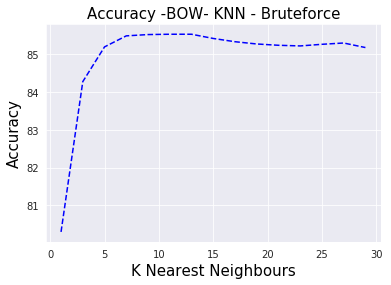

In [39]:
Accplot(cv,'BOW','Bruteforce')

###  K VS TRAIN & CV ERROR PLOT

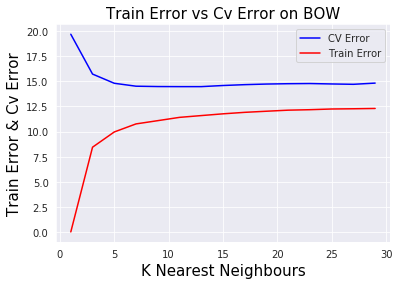

The Train Error is -:  10.675 %

The CV Error is -:  15.071 %



In [47]:
Trainplot(cv,train,'BOW')

##### From the given plot we can analyse that the optimal_k is 11 and it tends to go towards overfitting but it is not exactly overfitting as i have not plotted it till 50 or 100k so we can't be sure about it but i think that  a range between 13-17 will be a good one to declare optimal_k.

###  PREDICTING ON OPTIMAL K

In [48]:
pred = Test(x_train,y_train,x_test,y_test,opt,'brute')

The Accuracy is -:  83.8 %

The Test Error is -:  16.2 %



###  CONFUSION MATRIX BETWEEN ACTUAL AND PREDICTED CLASS LABELS

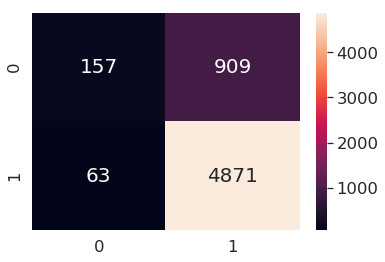

In [50]:
conf(y_test,pred)

###  CONVERTING FROM SPARSE TO DENSE MATRIX

In [53]:
d_train = x_train.todense(order=None, out=None)
d_test = x_test.todense(order=None, out=None)

In [54]:
print(d_train.shape)
print(d_test.shape)

(14000, 15029)
(6000, 15029)


###  CALLING Knn FUNCTION WITH KD-Tree ALGORITHM

In [56]:
cv,train,t,opt=KNN(d_train,y_train,'kd_tree')

In [57]:
print("Time taken to complete -: ",t,"sec\n")
print("Optimal_k -: ",opt,"\n")
print("Accuracy -: ",round(max(cv),3),"%")

Time taken to complete -:  15291.153882265091 sec

Optimal_k -:  11 

Accuracy -:  85.512 %


###  K  VS ACCURACY PLOT

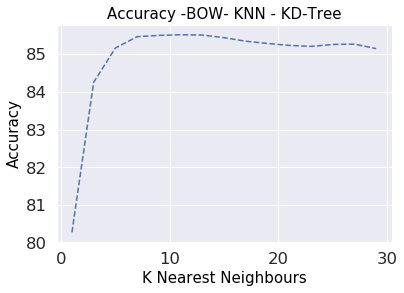

In [62]:
Accplot(cv,'BOW','KD-Tree')

###  K VS TRAIN & CV ERROR PLOT

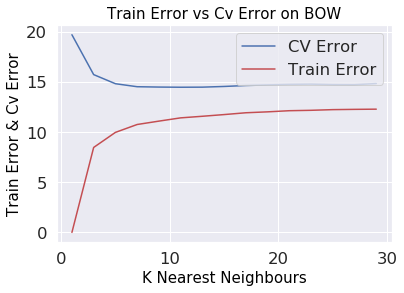

The Train Error is -:  10.683 %

The CV Error is -:  15.079 %



In [61]:
Trainplot(cv,train,'BOW')

##### This case is also similar to previous case as the difference in Train Error and Test Error is same.

###  PREDICTING ON OPTIMAL K

In [63]:
pred = Test(d_train,y_train,d_test,y_test,opt,'kd_tree')

The Accuracy is -:  83.75 %

The Test Error is -:  16.25 %



###  CONFUSION MATRIX BETWEEN ACTUAL AND PREDICTED CLASS LABELS

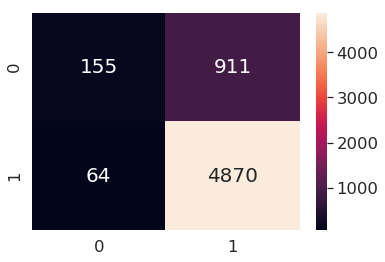

In [64]:
conf(y_test,pred)

# Knn Model on tf-IDF

![](https://lphinternetservices.com/images/TF-IDF-define.jpg)

###  SPLITTING INTO TRAIN AND TEST

In [65]:
x_train, x_test, y_train, y_test = Split(Data['CleanedText'].values,Data['Score'].values)

###  CONVERTING REVIEWS INTO VECTORS USING tf-IDF

In [66]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1)) 
x_train = tf_idf_vect.fit_transform(x_train)
x_test = tf_idf_vect.transform(x_test)

In [67]:
print("Train Dataset Shape -: ",x_train.shape)
print("Test Dataset Shape -: ",x_test.shape)

Train Dataset Shape -:  (14000, 15029)
Test Dataset Shape -:  (6000, 15029)


###   NORMALIZING THE DATA

In [68]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

###  CALLING Knn FUNCTION WITH BRUTEFORCE ALGORITHM

In [71]:
cv,train,t,opt=KNN(x_train,y_train,'brute')

In [72]:
print("Time taken to complete -: ",t,"sec\n")
print("Optimal_k -: ",opt,"\n")
print("Accuracy -: ",round(max(cv),3),"%")

Time taken to complete -:  285.0983760356903 sec

Optimal_k -:  9 

Accuracy -:  85.632 %


###  K  VS ACCURACY PLOT

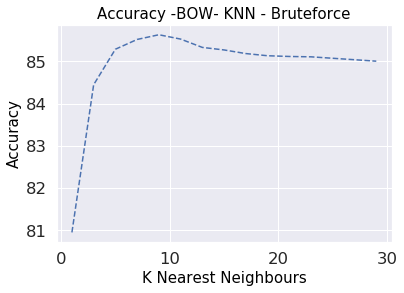

In [73]:
Accplot(cv,'BOW','Bruteforce')

###  K VS TRAIN & CV ERROR PLOT

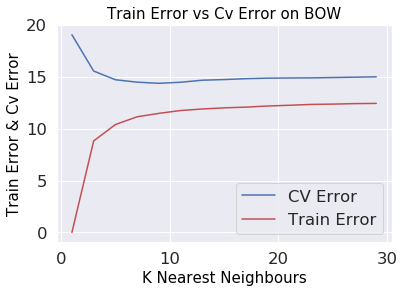

The Train Error is -:  10.901 %

The CV Error is -:  15.09 %



In [76]:
Trainplot(cv,train,'BOW')

##### In this case the difference between the Train and Test Error is less than BOW i.e 4.189 % but by amalysing the plot we can infer that optimal_k tends towards overfitting.

###  PREDICTING ON OPTIMAL K

In [77]:
pred = Test(x_train,y_train,x_test,y_test,opt,'brute')

The Accuracy is -:  83.6 %

The Test Error is -:  16.4 %



###  CONFUSION MATRIX BETWEEN ACTUAL AND PREDICTED CLASS LABELS

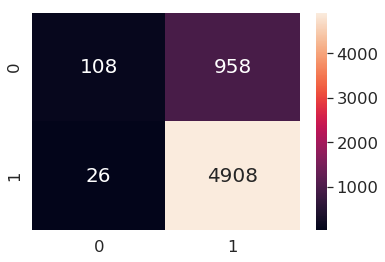

In [78]:
conf(y_test,pred)

###  CONVERTING FROM SPARSE TO DENSE MATRIX

In [20]:
d_train = x_train.todense(order=None, out=None)
d_test = x_test.todense(order=None, out=None)

###  CALLING Knn FUNCTION WITH KD-TREE ALGORITHM

In [21]:
cv,train,t,opt=KNN(d_train,y_train,'kd_tree')

In [22]:
print("Time taken to complete -: ",t,"sec\n")
print("Optimal_k -: ",opt,"\n")
print("Accuracy -: ",round(max(cv),3),"%")

Time taken to complete -:  16632.4118578434 sec

Optimal_k -:  9 

Accuracy -:  85.461 %


###  K  VS ACCURACY PLOT

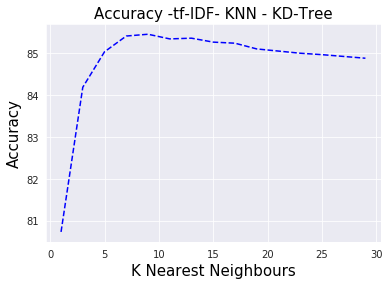

In [23]:
Accplot(cv,'tf-IDF','KD-Tree')

###  K VS TRAIN & CV ERROR PLOT

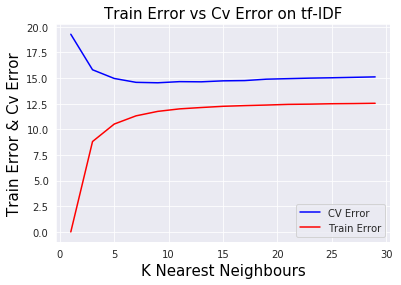

The Train Error is -:  11.059 %

The CV Error is -:  15.198 %



In [24]:
Trainplot(cv,train,'tf-IDF')

##### It is similar to previous case in terms of difference between test and train error and about optimal_k tending to overfit.

###  PREDICTING ON OPTIMAL K

In [25]:
pred = Test(d_train,y_train,d_test,y_test,opt,'kd_tree')

The Accuracy is -:  84.15 %

The Test Error is -:  15.85 %



###  CONFUSION MATRIX BETWEEN ACTUAL AND PREDICTED CLASS LABELS

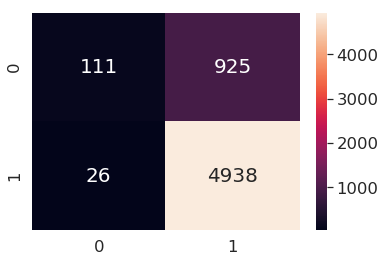

In [26]:
conf(y_test,pred)

# Knn on Avg Word2Vec

![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-gender-relation.png?w=596)

### SPLIT DATA INTO TRAIN AND TEST

In [52]:
'''
Here we are taking two lists and putting the data separate as Test in l4 and Train in l5.
'''

l4=[]
for i in range(14000):
    l1=Data['CleanedText'].values[i]
    l2=str(l1)
    l4.append(l2)

l5=[]
for i in range(14000,20000,1):
    l1=Data['CleanedText'].values[i]
    l2=str(l1)
    l5.append(l2)

### MAKING LIST OF WORDS

In [53]:
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

#------------------------------------------ TRAIN DATASET ---------------------------------------------------------------------
# making a list of words for each review.
i=0
list_of_sent=[] # list to store all the lists.
for sent in l4:
    filtered_sentence=[] # list to store each review.
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

# ------------------------------------------- TEST DATASET ---------------------------------------------------------------------    
    
# making a list of words for each review.
i=0
list_of_sent1=[] # list to store all the lists.
for sent in l5:
    filtered_sentence=[] # list to store each review.
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent1.append(filtered_sentence)

In [54]:
print("____________________________________ TRAINING DATA ___________________________________________________")
print(Data['CleanedText'].values[3])

print("\n" + "********************Converted these sentences into a list of words each***********************\n ")

# First Review with breaking into words. 
print(list_of_sent[3])

#-------------------------------------------------------------------------------------------------------------------
print("--------------------------------------------------------------------------------------------------------------")

print("____________________________________ TEST DATA ___________________________________________________")

print(Data['CleanedText'].values[-1])

print("\n" + "********************Converted these sentences into a list of words each***********************\n ")

# First Review with breaking into words. 
print(list_of_sent1[-1])

____________________________________ TRAINING DATA ___________________________________________________
b'love sauc put everyth'

********************Converted these sentences into a list of words each***********************
 
['blove', 'sauc', 'put', 'everyth']
--------------------------------------------------------------------------------------------------------------
____________________________________ TEST DATA ___________________________________________________
b'like product price point flavor veri strong overpow perhap figur name'

********************Converted these sentences into a list of words each***********************
 
['blike', 'product', 'price', 'point', 'flavor', 'veri', 'strong', 'overpow', 'perhap', 'figur', 'name']


### TRAINING THE MODEL ON TRAIN DATA

In [55]:
'''
Trained our own model on the training data only with feature size or dimension = 100 with min_count = 2 this means that 
if a word comes atleast 2 times only then consider it otherwise leave it.
'''
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=2,size=100, workers=4)

###  CONVERTING REVIEWS INTO VECTORS USING AVG WORD2VEC

In [56]:
'''
Converting the reviews into vectors by using the above trained model.
'''
#-------------------------------------- TRAIN DATASET ------------------------------------------------------------------
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

#------------------------------------- TEST DATASET --------------------------------------------------------------------    
'''
Here we are converting reviews of test data using the vocabulary of training data to make the concept to generalization 
meaningful and fruitful.
'''
sent_vectors1 = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent1: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors1.append(sent_vec)

### CHECKING THE Nan VALUE

In [57]:
'''
Here we are checking the Nan values as these creates a lot of problem and it occurs when we divide any value by 0 this
means a value of high range i.e infinity.
'''
sent_vectors=np.array(sent_vectors)
print(np.isnan(sent_vectors).any())
sent_vectors1=np.array(sent_vectors1)
print(np.isnan(sent_vectors1).any())

False
False


In [58]:
print(sent_vectors.shape)
print(sent_vectors1.shape)

(14000, 100)
(6000, 100)


###   NORMALIZING THE DATA 

In [59]:
sent_vectors=preprocessing.normalize(sent_vectors)
sent_vectors1=preprocessing.normalize(sent_vectors1)

###  CALLING Knn FUNCTION WITH BRUTEFORCE ALGORITHM

In [60]:
x_train, x_test, y_train, y_test = Split(Data['CleanedText'].values,Data['Score'].values)

In [62]:
cv,train,t,opt=KNN(sent_vectors, y_train, 'brute')

In [63]:
print("Time taken to complete -: ",t,"sec\n")
print("Optimal_k -: ",opt,"\n")
print("Accuracy -: ",round(max(cv),3),"%")

Time taken to complete -:  126.74465680122375 sec

Optimal_k -:  13 

Accuracy -:  85.315 %


###  K  VS ACCURACY PLOT

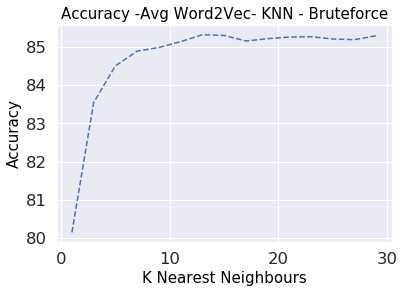

In [64]:
Accplot(cv,'Avg Word2Vec','Bruteforce')

###  K VS TRAIN & CV ERROR PLOT

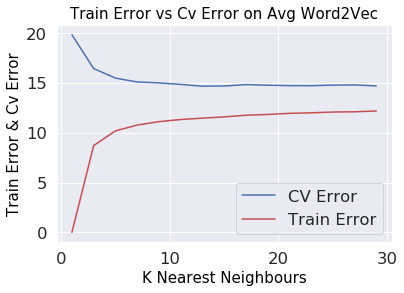

The Train Error is -:  10.615 %

The CV Error is -:  15.309 %



In [65]:
Trainplot(cv,train,'Avg Word2Vec')

##### By analyzing this we can say that neither it is overfitting nor underfitting and the optimal_k is between the 2 i.e 13 but we can't be so sure as we have not plotted it on whole dataset and moreover we had not taken k values till 50 or 100 maybe then the picture will become clear.

###  PREDICTING ON OPTIMAL K

In [66]:
pred = Test(sent_vectors, y_train, sent_vectors1, y_test, opt, 'brute')

The Accuracy is -:  84.283 %

The Test Error is -:  15.717 %



###  CONFUSION MATRIX BETWEEN ACTUAL AND PREDICTED CLASS LABELS

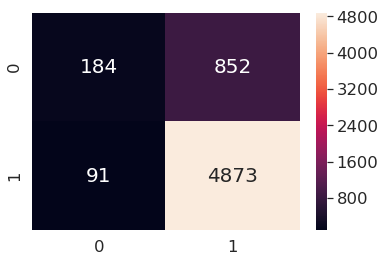

In [67]:
conf(y_test,pred)

###  CONVERTING FROM SPARSE TO DENSE MATRIX

In [79]:
b1=sparse.csr_matrix(sent_vectors)
b2=sparse.csr_matrix(sent_vectors1)

In [80]:
d_train = b1.todense(order=None, out=None)
d_test = b2.todense(order=None, out=None)

###  CALLING Knn FUNCTION WITH KD-TREE ALGORITHM

In [84]:
cv,train,t,opt=KNN(d_train, y_train, 'kd_tree')

In [85]:
print("Time taken to complete -: ",t,"sec\n")
print("Optimal_k -: ",opt,"\n")
print("Accuracy -: ",round(max(cv),3),"%")

Time taken to complete -:  992.0894522666931 sec

Optimal_k -:  13 

Accuracy -:  85.315 %


##### The KD-TREE is giving the same results as bruteforce but is taking long to compute as the data given to the algorithm is dense.

###  K  VS ACCURACY PLOT

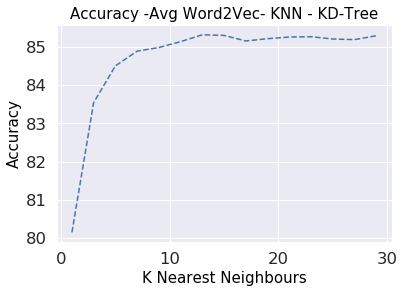

In [86]:
Accplot(cv,'Avg Word2Vec','KD-Tree')

###  K VS TRAIN & CV ERROR PLOT

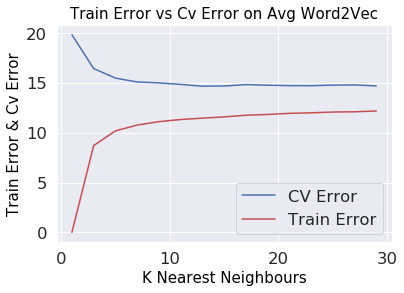

The Train Error is -:  10.615 %

The CV Error is -:  15.309 %



In [87]:
Trainplot(cv,train,'Avg Word2Vec')

###  PREDICTING ON OPTIMAL K

In [88]:
pred = Test(d_train, y_train, d_test, y_test, opt, 'kd_tree')

The Accuracy is -:  84.283 %

The Test Error is -:  15.717 %



###  CONFUSION MATRIX BETWEEN ACTUAL AND PREDICTED CLASS LABELS

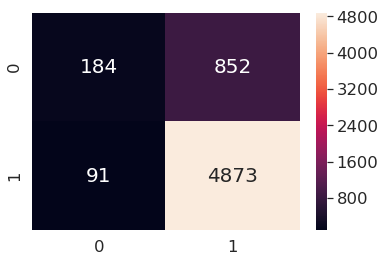

In [89]:
conf(y_test,pred)

# Knn Model On tf-IDF Word2Vec

#### NOTE : I forgot to save it so have to do it again.

In [93]:
x_train, x_test, y_train, y_test = Split(Data['CleanedText'].values,Data['Score'].values)

In [94]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1)) 
x_train = tf_idf_vect.fit_transform(x_train)
x_test = tf_idf_vect.transform(x_test)

### TRAINING OWN MODEL ON TRAIN DATASET

In [95]:
model=gensim.models.Word2Vec(list_of_sent,min_count=2,size=100, workers=4)

###  CONVERTING REVIEWS INTO VECTORS USING tf-IDF WORD2VEC

In [97]:
#--------------------------------------- TRAIN DATASET ---------------------------------------------------------------- 

tfidf_feat = tf_idf_vect.get_feature_names()

tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = x_train[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1

    
#----------------------------------------- TEST DATASET ---------------------------------------------------------------

tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent1: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = x_test[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1


### CHECKING THE Nan VALUE

In [98]:
train = np.array(tfidf_sent_vectors_train)
test = np.array(tfidf_sent_vectors_test)
print(np.isnan(train).any())
print(np.isnan(test).any())

False
False


###   NORMALIZING THE DATA 

In [101]:
train_ = preprocessing.normalize(train)
test_ = preprocessing.normalize(test)

###  CALLING Knn FUNCTION WITH BRUTEFORCE ALGORITHM

In [103]:
cv,train,t,opt=KNN(train_, y_train, 'brute')

In [104]:
print("Time taken to complete -: ",t,"sec\n")
print("Optimal_k -: ",opt,"\n")
print("Accuracy -: ",round(max(cv),3),"%")

Time taken to complete -:  113.40949702262878 sec

Optimal_k -:  11 

Accuracy -:  85.152 %


###  K  VS ACCURACY PLOT

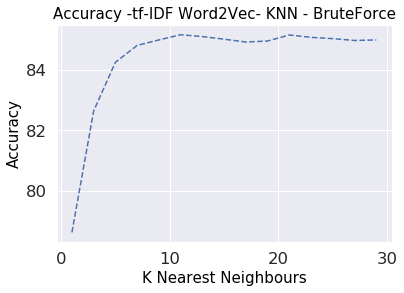

In [105]:
Accplot(cv,'tf-IDF Word2Vec','BruteForce')

###  K VS TRAIN & CV ERROR PLOT

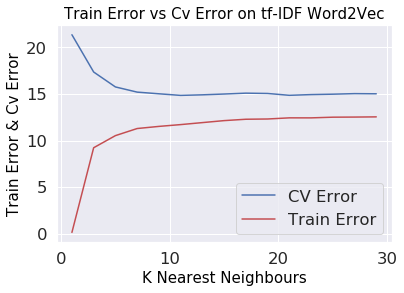

The Train Error is -:  11.031 %

The CV Error is -:  15.627 %



In [107]:
Trainplot(cv,train,'tf-IDF Word2Vec')

###  PREDICTING ON OPTIMAL K

In [108]:
pred = Test(train_, y_train, test_, y_test, opt, 'brute')

The Accuracy is -:  83.0 %

The Test Error is -:  17.0 %



###  CONFUSION MATRIX BETWEEN ACTUAL AND PREDICTED CLASS LABELS

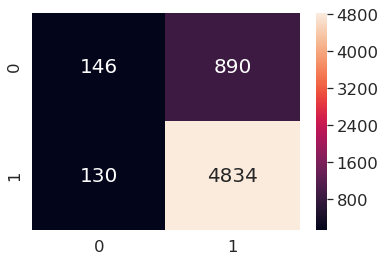

In [109]:
conf(y_test,pred)

###  CONVERTING FROM SPARSE TO DENSE MATRIX

In [111]:
b1=sparse.csr_matrix(train_)
b2=sparse.csr_matrix(test_)
training = b1.todense()
testing = b2.todense()

###  CALLING Knn FUNCTION WITH KD-TREE ALGORITHM

In [115]:
cv,train,t,opt=KNN(training, y_train, 'kd_tree')

In [116]:
print("Time taken to complete -: ",t,"sec\n")
print("Optimal_k -: ",opt,"\n")
print("Accuracy -: ",round(max(cv),3),"%")

Time taken to complete -:  978.9853284358978 sec

Optimal_k -:  11 

Accuracy -:  85.152 %


###  K  VS ACCURACY PLOT

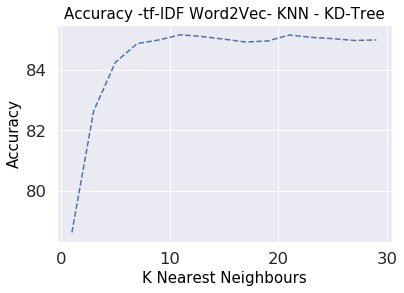

In [117]:
Accplot(cv,'tf-IDF Word2Vec','KD-Tree')

###  K VS TRAIN & CV ERROR PLOT

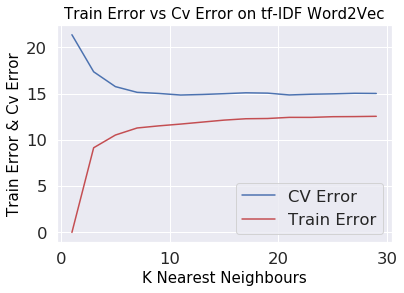

The Train Error is -:  11.019 %

The CV Error is -:  15.623 %



In [118]:
Trainplot(cv,train,'tf-IDF Word2Vec')

###  PREDICTING ON OPTIMAL K

In [119]:
pred = Test(train_, y_train, test_, y_test, opt, 'kd_tree')

The Accuracy is -:  83.0 %

The Test Error is -:  17.0 %



###  CONFUSION MATRIX BETWEEN ACTUAL AND PREDICTED CLASS LABELS

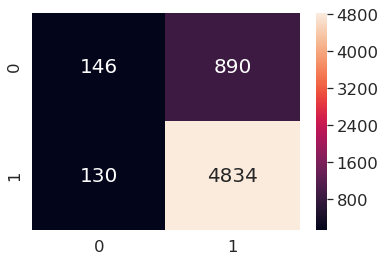

In [120]:
conf(y_test,pred)

# CONCLUSION

In [11]:
x = PrettyTable()

x.field_names = ["NLP Technique", "Algorithm", "Accuracy(%)", "Hyperparameter", "Train Error(%)", "Test Error(%)", "Time(in sec)"]

x.add_row(["BOW", "BruteForce", 83.80, 11, 10.675, 16.20, 284])
x.add_row(["BOW", "KD-Tree", 83.75, 11, 10.683, 16.25, 15291])
x.add_row(["tf-IDF", "BruteForce", 83.60, 9, 10.901, 16.40, 285])
x.add_row(["tf-IDF", "KD-Tree", 84.15, 9, 11.059, 15.85, 16632])
x.add_row(["Avg Word2Vec", "BruteForce", 84.283, 13, 10.615, 15.717, 126])
x.add_row(["Avg Word2Vec", "KD-TREE", 84.283, 13, 10.615, 15.717, 992])
x.add_row(["tf-IDF Word2Vec", "BruteForce", 83.0, 11, 11.031, 17.0, 113])
x.add_row(["tf-IDF Word2Vec", "KD-TREE", 83.0, 11, 11.019, 17.0, 978])

print(x)

+-----------------+------------+-------------+----------------+----------------+---------------+--------------+
|  NLP Technique  | Algorithm  | Accuracy(%) | Hyperparameter | Train Error(%) | Test Error(%) | Time(in sec) |
+-----------------+------------+-------------+----------------+----------------+---------------+--------------+
|       BOW       | BruteForce |     83.8    |       11       |     10.675     |      16.2     |     284      |
|       BOW       |  KD-Tree   |    83.75    |       11       |     10.683     |     16.25     |    15291     |
|      tf-IDF     | BruteForce |     83.6    |       9        |     10.901     |      16.4     |     285      |
|      tf-IDF     |  KD-Tree   |    84.15    |       9        |     11.059     |     15.85     |    16632     |
|   Avg Word2Vec  | BruteForce |    84.283   |       13       |     10.615     |     15.717    |     126      |
|   Avg Word2Vec  |  KD-TREE   |    84.283   |       13       |     10.615     |     15.717    |     992

![](https://clip2art.com/images/professional-clipart-conclusion-18.jpg)

### 1. The comparison shows that Avg Word2Vec is a good technique with an accuracy of 84.283 %.
### 2. Therefore the best hyperparameter is 13 with best fit on 20k reviews.
### 3. But, we can't say that the conclusion is final for the whole dataset as the Reviews used are only 20k.
### 4. Both Algorithms KD-Tree and Bruteforce shows Approximately similar results when applied on Amazon Reviews Dataset.
### 5. Moreover, Knn is also not good as it is taking much time to run, therefore, we can't say it is the best algorithm for this dataset.
### 6. The time taken by KD-TREE algo is very large as the data is dense as compared to sparse matrix in bruteforce.